In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [56]:
# Features Description
Feat_described = pd.read_excel('Healthcare_dataset.xlsx')

Feat_described

,Bucket,Variable,Variable Description
0,Unique Row Id,Patient ID,Unique ID of each patient
1,Target Variable,Persistency_Flag,Flag indicating if a patient was persistent or...
2,Demographics,Age,Age of the patient during their therapy
3,NaN,Race,Race of the patient from the patient table
4,NaN,Region,Region of the patient from the patient table
5,NaN,Ethnicity,Ethnicity of the patient from the patient table
6,NaN,Gender,Gender of the patient from the patient table
7,NaN,IDN Indicator,Flag indicating patients mapped to IDN
8,Provider Attributes,NTM - Physician Specialty,Specialty of the HCP that prescribed the NTM Rx
9,Clinical Factors,NTM - T-Score,T Score of the patient at the time of the NTM ...


In [15]:
# Read data into DataFrame
df = pd.read_excel('Healthcare_dataset.xlsx', sheet_name='Dataset')

df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [57]:
# Dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [58]:
# Numerical data properties
df.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


There 68 independent variable and one target variable. 66 of the 68 independent variables are categorical variables and 2 are numerical variables.

In [59]:
# Missing Values
print(f'Missing Values: {df.isnull().sum().sum()}')
print(f'Duplicated Values: {df.duplicated().sum()}')


Missing Values: 0
Duplicated Values: 0


Distribution of the numerical columns

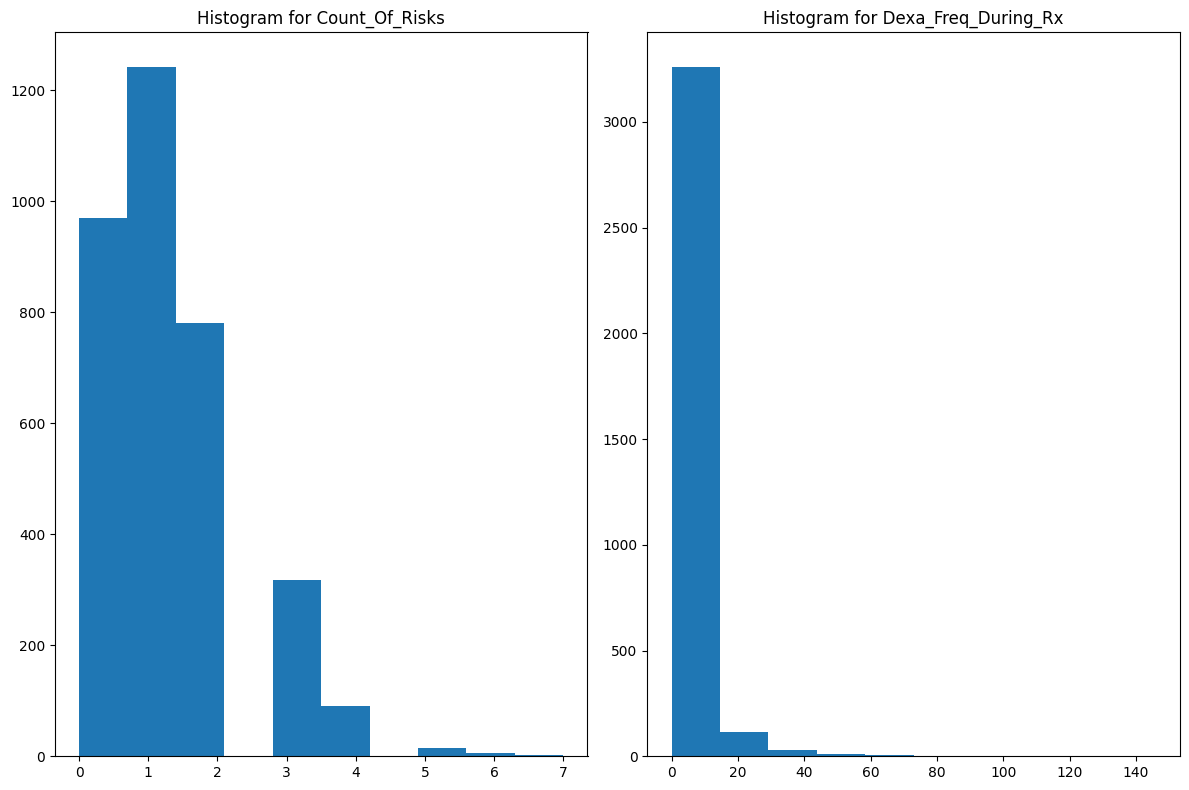

In [60]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# Plot the histogram for 'Count_Of_Risks' in the first subplot
axes[0].hist(df['Count_Of_Risks'])
axes[0].set_title('Histogram for Count_Of_Risks')

# Plot the histogram for 'Dexa_Freq_During_Rx' in the second subplot
axes[1].hist(df['Dexa_Freq_During_Rx'])
axes[1].set_title('Histogram for Dexa_Freq_During_Rx')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Boxplot for Outliers

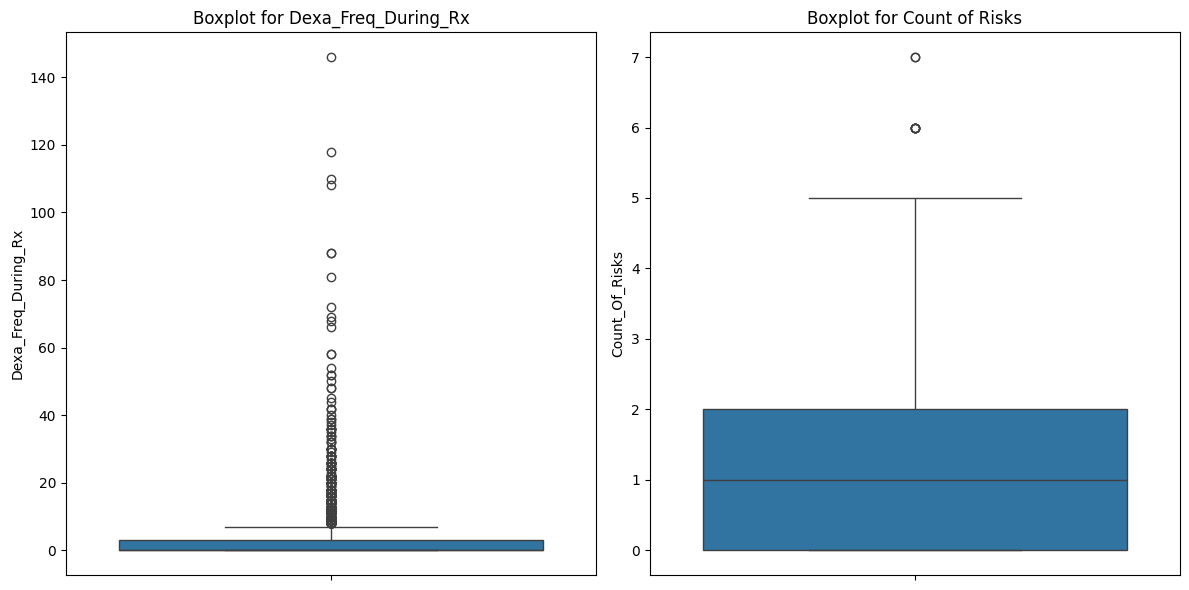

In [61]:
# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot for 'Dexa_Freq_Level'
sns.boxplot(y=df['Dexa_Freq_During_Rx'], ax=axes[0])
axes[0].set_title('Boxplot for Dexa_Freq_During_Rx')
axes[0].set_ylabel('Dexa_Freq_During_Rx')

# Boxplot for 'Risk_Level'
sns.boxplot(y=df['Count_Of_Risks'], ax=axes[1])
axes[1].set_title('Boxplot for Count of Risks')
axes[1].set_ylabel('Count_Of_Risks')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

There are outliers in the numerical columns

Check Imbalance

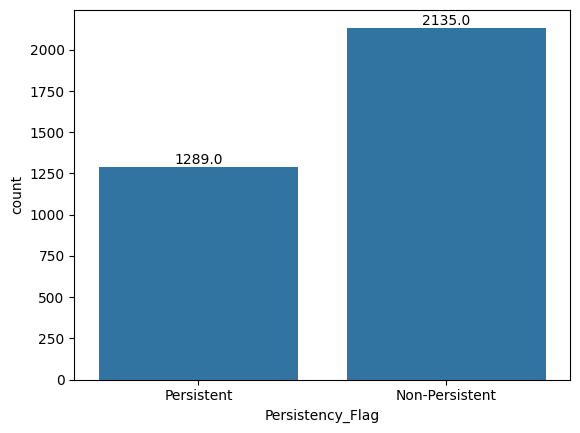

In [62]:
# Create the countplot
ax = sns.countplot(data=df, x='Persistency_Flag')

# Add value labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()

Dataset is imbalanced

Problems in the dataset
-   Outliers
-   Not normally distributed
-   Imbalanced

How to handle the problems in the dataset